In [1]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
#Modified by Ndiame Ndiaye (student ID: 260744987)
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 

We will add a similar study of the effects of inexact arithmetic on the computation of sin(x) whose Taylor expansion is:

$$
sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} + \ldots + (-1)^n*\frac{x^{2n+1}}{(2n+1)!} +\ldots .
$$

The functions for exponential have analogues with sin with appropriate names.

In [3]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [4]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

The next functions will compute the truncated Taylor series for sine instead of exponential and the list given some n and x.

In [ ]:
def sinser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for sin
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=x
    y=b
    for i in range(3,n+1,2): # we increment by 2 for the sin function's expansion
        b*=-float(x*x)/(i*(i-1.))
        r1=2*eps*rn.random()-eps #This is to compute x^2
        r2=2*eps*rn.random()-eps #This is to compute i*(i-1)
        r3=2*eps*rn.random()-eps #This is to compute the quotient
        r=(1.+r1)*(1.+r2)*(1.+r2)-1 #This is the final error
        y+=(b*(1.+r))
    return y

In [6]:
def sinserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(sinser(n,x,eps))
    return ylist

In [7]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [8]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [9]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

The next 3 functions are slight modifications of the error functions for exponential adapted to sine.

In [10]:
def errxlist2(n,xlist,eps):
#difference between Tn(x) and sin(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

In [11]:
def errelist2(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

In [12]:
def errnlist2(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(sinser(n,x,eps)-np.sin(x))
    return yy

The following is the graph for the absolute error with the exponential

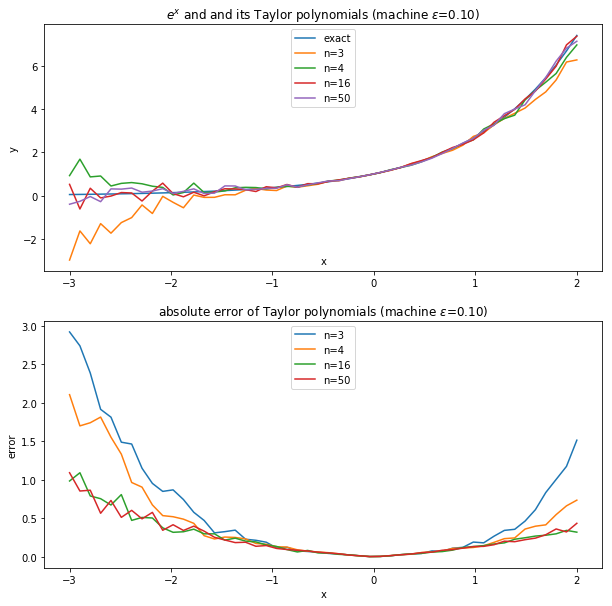

In [21]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16,50]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps)) #We divide by the exact value to get the relative error.
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps)) #We divide by the exact value to get the relative error.
        y=(np.maximum(y,z))
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'absolute error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()
#The error for n=16 and n=50 are very close

The following is the graph for the relative error with the exponential

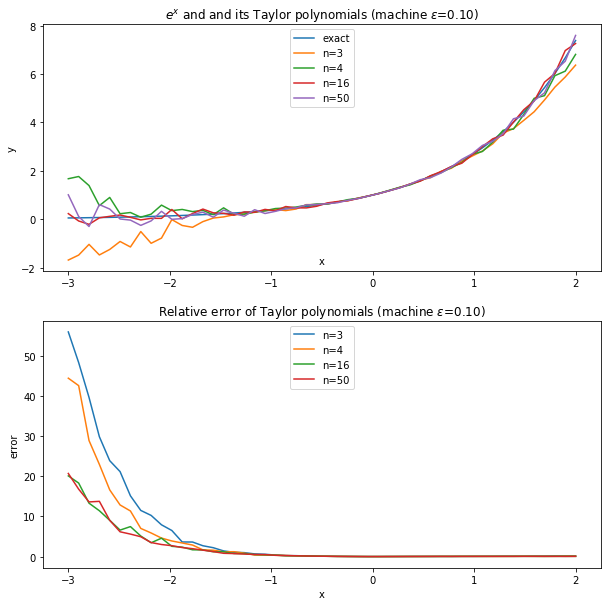

In [22]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16,50]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))/(np.exp(xlist)) #We divide by the exact value to get the relative error.
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))/(np.exp(xlist)) #We divide by the exact value to get the relative error.
        y=(np.maximum(y,z))
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

The following is the graph for the absolute error with the sine

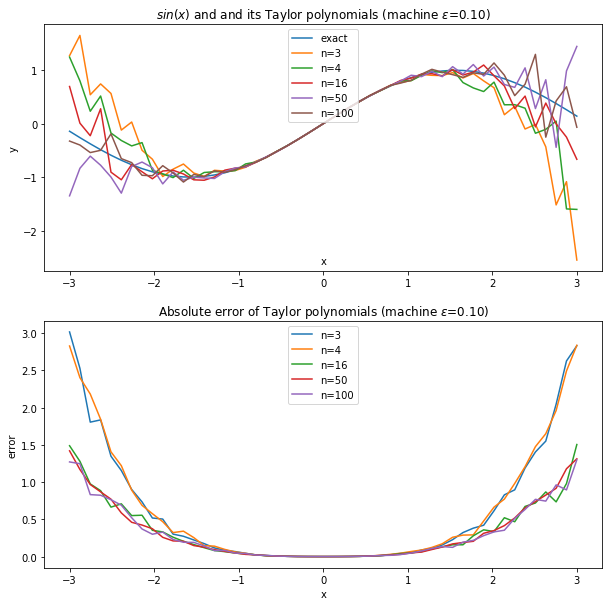

In [35]:
xlist = np.linspace(-3, 3, 50)
nlist = [3,4,16,50,100]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist2(n,xlist,eps)) #We divide by the exact value to get the relative error.
    for k in range(1,kmax):
        z=np.abs(errxlist2(n,xlist,eps)) #We divide by the exact value to get the relative error.
        y=(np.maximum(y,z))
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'Absolute error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()
# we see that for n=50 and n=100 the error doesn't change much

The  is the graph for the relative error with the sine

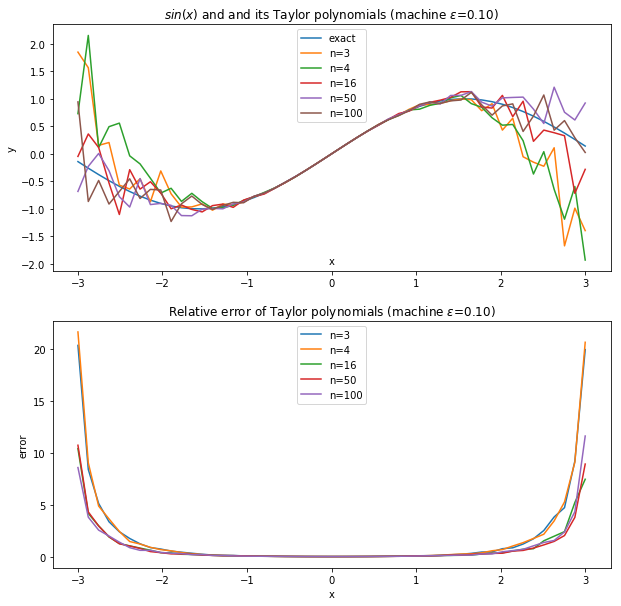

In [24]:
xlist = np.linspace(-3, 3, 50)
nlist = [3,4,16,50,100]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.sin(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,sinserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist2(n,xlist,eps)/np.sin(xlist)) #We divide by the exact value to get the relative error.
    for k in range(1,kmax):
        z=np.abs(errxlist2(n,xlist,eps)/np.sin(xlist)) #We divide by the exact value to get the relative error.
        y=(np.maximum(y,z))
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$sin(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'Relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()
# we see that for n=50 and n=100 the error doesn't change much

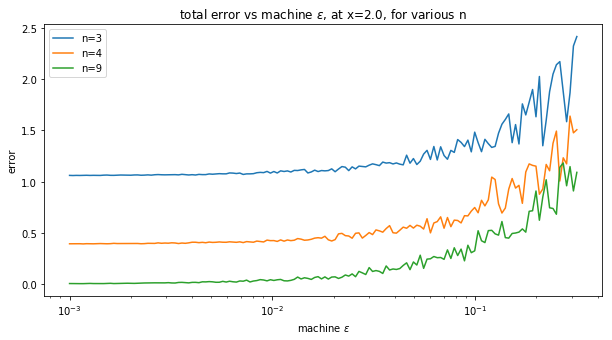

In [15]:
#For exponential:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

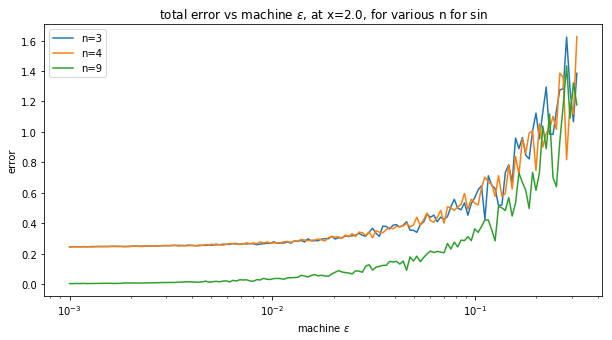

In [16]:
#For sine:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist2(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist2(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n for sin'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

In both of the following graphs, we see that as we increase the number of iterations, the error tends to a constant, even when we increase x which increases the error.

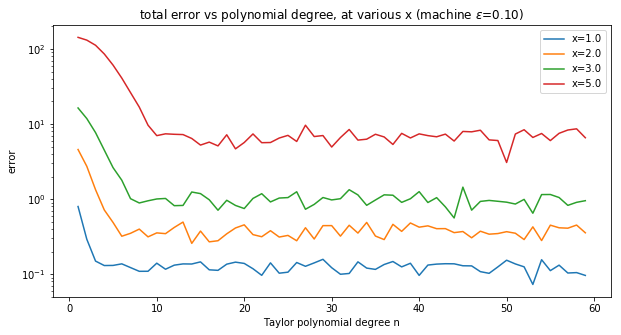

In [32]:
#For exponential:
xlist = [1,2,3,5]
nlist=range(1,60)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

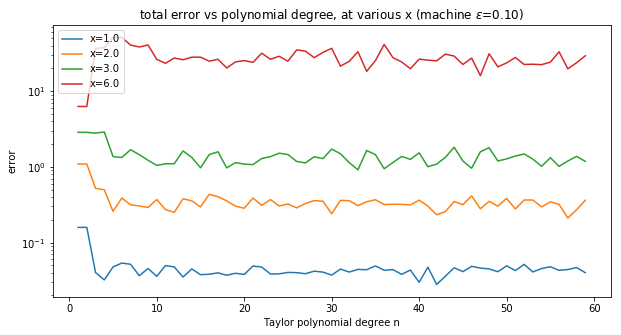

In [31]:
#For sine:
xlist = [1,2,3,6]
nlist=range(1,60)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist2(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist2(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()